Differentiating the Cat and dog images using Svd and then implimenting diffenent machine learning algorithms and compare them and conclude best results

Importing libraries

In [1]:
from os import listdir
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot as plt
from matplotlib.image import imread
import pywt   # Image preprocessing tool
import pywt.data

In [ ]:
#path of the dataset
# the dataset of cats and dogs is available at :https://www.kaggle.com/c/dogs-vs-cats
f = 'path of the file should be written' 

size = 200 #picture size
num = 4000 #number of images per category
#The number of images are taken 2 x 4000 = 8000 because the total dataset is so big and is computationally very costly
#so the dataset is taken partially.

#initializing the variables
mc= np.zeros(((int(size/2)+2)*(int(size/2)+2),num))
md= np.zeros(((int(size/2)+2)*(int(size/2)+2),num))
n = 0
name = []

#Here we load cat images and dog images seperately and store them
#By Refering to Brunton & Kutz. Data Driven Science and Engineering:
#Machine Learning, Dynamical Systems, and Control. Cambridge 2019. It is seen that taking the Image wavelets the outline of the 
# dogs and cats more clear and the features are easily distingushed than compared to the normal dataset and also the dataset is compressed 
#if we use this method
for i in range(0,num):
    s =  f+'cat.'+ str(i) + '.jpg' 
    dummy = img_to_array(load_img(s, target_size = (size,size))) 
    dummy = dummy.astype(int)
    dummy = np.mean(dummy,-1)
    LL,LH = pywt.dwt2(dummy, 'bior1.3')
    LH = LH[0]+LH[1]+LH[2]
    LH = LH.flatten()
    mc[:,n] = LH
    n = n+1
#    name.append(label)
n = 0
for i in range(0,num):
    s =  f+'dog.'+ str(i) + '.jpg' 
    dummy = img_to_array(load_img(s, target_size = (size,size)))
    dummy = dummy.astype(int)
    dummy = np.mean(dummy,-1)
    LL,LH = pywt.dwt2(dummy, 'bior1.3')
    LH = LH[0]+LH[1]+LH[2]
    LH = LH.flatten()
    md[:,n] = LH
    n = n+1
# the data is appended in the dataset
m =  np.concatenate((mc,md),axis=1)
#making the labels
labelc = np.ones(num)
labeld = np.zeros(num)
y = np.concatenate((labelc,labeld),axis=0)


In [3]:
#Performing the Singular value decomposition
# this is done because by using the svd we can extract the features that are dominent in the cat and the dog images by performing 
#this we can reduce the features which are dominent and then we can use that data for training the dataset 
u,s,v = np.linalg.svd(m, full_matrices=False)


In [4]:
# Top dominent features are extracted and are used for training the dataset
# the m matrix which consists of all the data is long and narrow configuration (10404x8000) so we have to take the v matrix 
# as the dataset 
data =  v[:,:5]

In [5]:
#Shuffeling the dataset randomly and then splitting it into test and training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.3, random_state = 1)


Before training the dataset first try to plot the first 3 dominent features and try to visualize how the data is distributed 

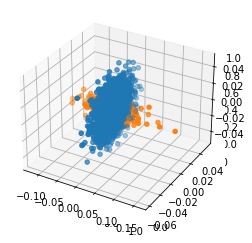

In [6]:

import pandas as pd
import seaborn as sns

px = X_train[:,0]
py = X_train[:,1]

pz = X_train[:,2]

df = pd.DataFrame({'px': px,'py':py,'label': y_train }, columns=['px','py','label'])
df['Label'] = df['label'].astype('category') 
df['Label'].cat.categories= ['dogs','cats']


n = 0
cat = []
dog = []
c = 0
d=0
n = 0
ax = plt.axes(projection = '3d')
for i in y_train:
    if i ==1:
        catd = X_train[n]
        cat.append(catd)
        c =c+1
    else:
        dogd = X_train[n]
        d = d+1
        dog.append(dogd)
        
    n=n+1
ax = plt.axes(projection = '3d')

cat = np.asarray(cat)
dog = np.asarray(dog)
cx = cat[:,0]
cy = cat[:,1]
cz = cat[:,2]
dx = dog[:,0]
dy = dog[:,1]
dz = dog[:,2]
ax.scatter(cx,cy,cz)
ax.scatter(dx,dy,dz)


The more clearer image is shown in the figure below, we can clearly see how the data is distributed. The cats and dogs are intersecting in the mid of the distribution, So Methods like logastic regression,SVC(linear) cannot distingush this dataset properly that is for sure. SVC(rbf), Naive Bayes classifier, random forest,KNN gives a better results, although not accurate enough, we can use CNN and try to differentiate for better results.

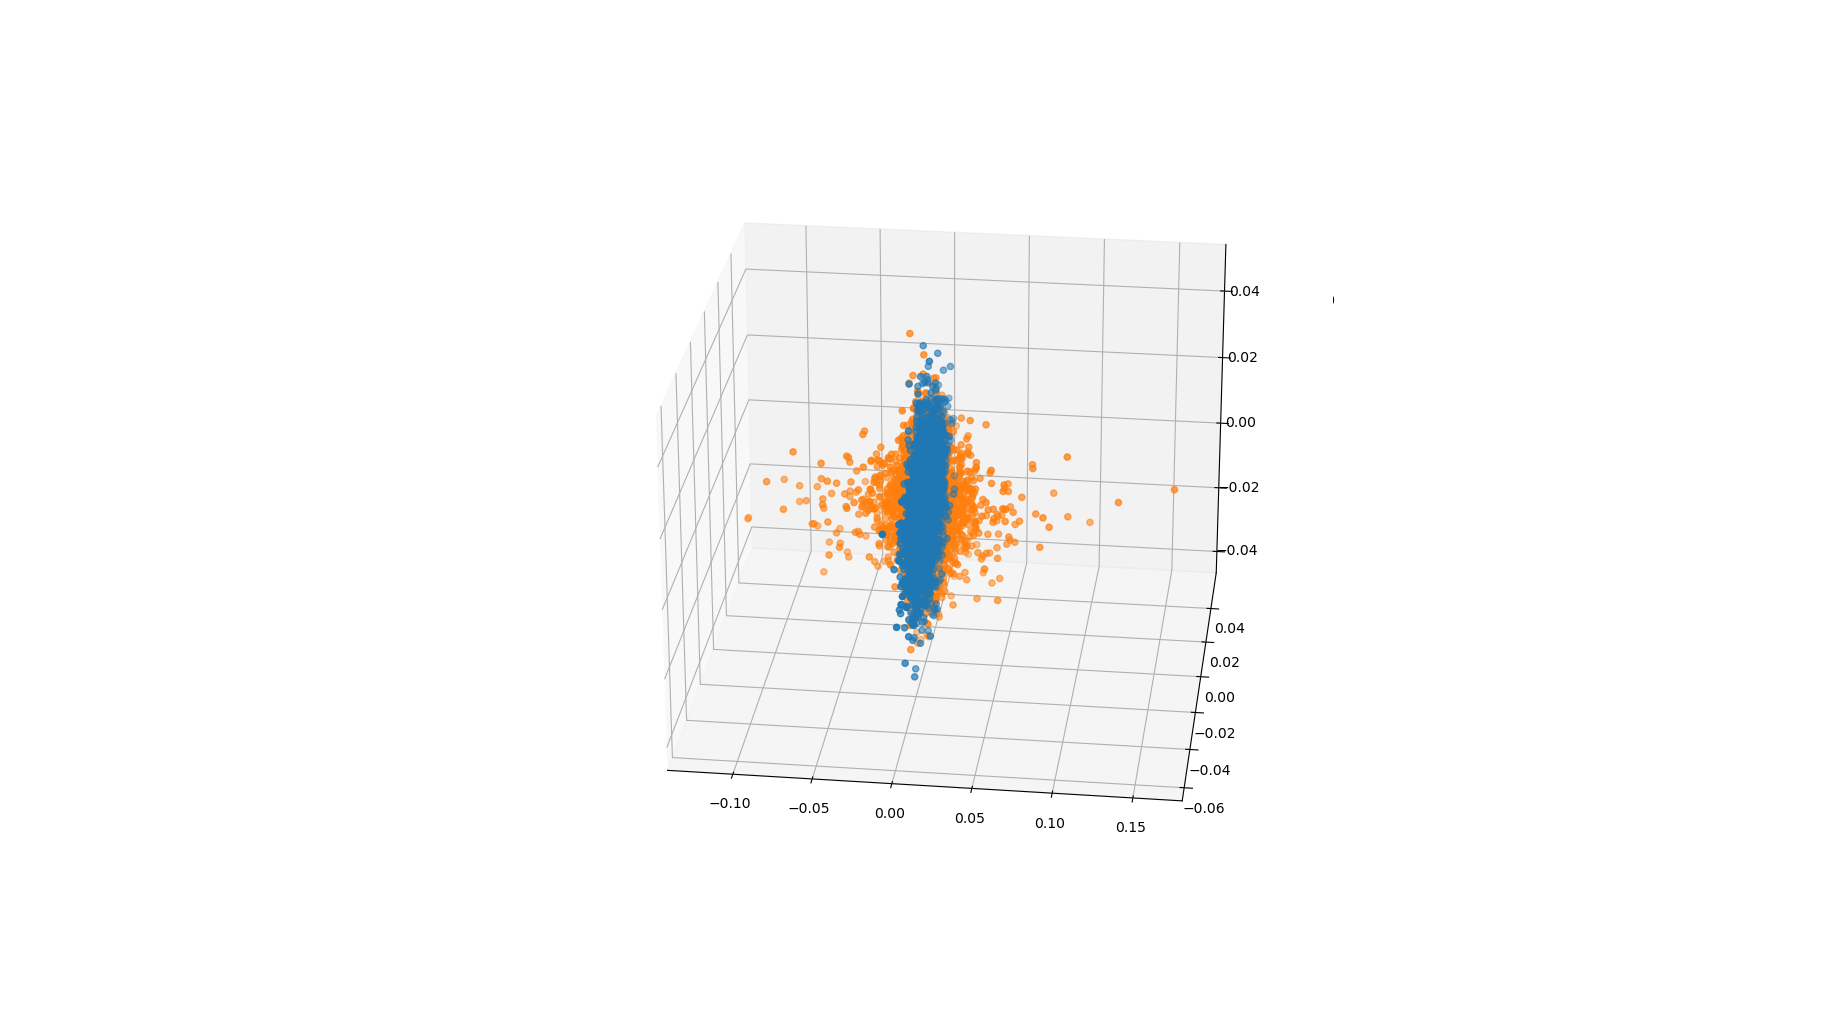

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier.fit(X_train,y_train)

#X_test = np.concatenate((X_testc,X_testd),axis=0)
y_pred = classifier.predict(X_test)


# Y_test = np.concatenate((y_test,y_testd),axis=0)


from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)
print('Accuracy score: ')
print(accuracy_score(y_test, y_pred))



Confusion matrix:
[[919 297]
 [291 893]]
Accuracy score: 
0.755


In [8]:
# Training the SVM model(rbf) on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting a new result


# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)
print('Accuracy score: ')
print(accuracy_score(y_test, y_pred))



Confusion matrix:
[[880 336]
 [216 968]]
Accuracy score: 
0.77


In [9]:
# Training the SVM model(linear) on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting a new result


# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)
print('Accuracy score: ')
print(accuracy_score(y_test, y_pred))

Confusion matrix:
[[   0 1216]
 [   0 1184]]
Accuracy score: 
0.49333333333333335


In [10]:
# Training the SVM model(ploy) on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting a new result


# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)
print('Accuracy score: ')
print(accuracy_score(y_test, y_pred))

Confusion matrix:
[[736 480]
 [670 514]]
Accuracy score: 
0.5208333333333334


In [11]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting a new result


# Predicting the Test set results
y_pred = classifier.predict(X_test)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)
print('Accuracy score: ')
print(accuracy_score(y_test, y_pred))



Confusion matrix:
[[ 122 1094]
 [ 112 1072]]
Accuracy score: 
0.4975


In [12]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting a new result


# Predicting the Test set results
y_pred = classifier.predict(X_test)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)
print('Accuracy score: ')
print(accuracy_score(y_test, y_pred))

Confusion matrix:
[[ 800  416]
 [ 145 1039]]
Accuracy score: 
0.76625


In [15]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting a new result


# Predicting the Test set results
y_pred = classifier.predict(X_test)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)
print('Accuracy score: ')
print(accuracy_score(y_test, y_pred))

Confusion matrix:
[[849 367]
 [325 859]]
Accuracy score: 
0.7116666666666667


In [14]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 13, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting a new result


# Predicting the Test set results
y_pred = classifier.predict(X_test)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)
print('Accuracy score: ')
print(accuracy_score(y_test, y_pred))

Confusion matrix:
[[863 353]
 [240 944]]
Accuracy score: 
0.7529166666666667


From the above it is conculsive that the above methods are not suitable to distinguish this  dataset. The maximum accuracy is found in:
1. SVM(rbf) = 0.77
2. Navie Bayes = 0.766
3. KNN = 0.755
4. Random forest = 0.752

The Logistic Regression model and SVM(linear) totally failed to distinguish this dataset as the data was impossible seperate using a hyperplane linearly

It is interesting to see that the ploynomial kernal also fails to differentiate between the cats and dogs

KNN, Navie Bayes gives a better solution because these methods depends on nearest points, rather than the hyperplane as shown above, the data is clustered except at the center where the data intersects. So, error is expected if the image falls in that region. 